In [ ]:
import pandas as pd

# STEP 1 — Load dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dublin Bus/data_processed/dublinbikes_20190101_20190401.csv")

# Show basic info
print("----- SHAPE -----")
print(df.shape)

print("\n----- HEAD -----")
print(df.head())

print("\n----- DATA TYPES -----")
print(df.dtypes)

print("\n----- NULL VALUES -----")
print(df.isnull().sum())


----- SHAPE -----
(2912994, 11)

----- HEAD -----
   STATION ID                 TIME         LAST UPDATED           NAME  \
0           1  2019-01-01 00:00:03  2018-12-31 23:50:05  CLARENDON ROW   
1           1  2019-01-01 00:05:03  2019-01-01 00:00:14  CLARENDON ROW   
2           1  2019-01-01 00:10:02  2019-01-01 00:00:14  CLARENDON ROW   
3           1  2019-01-01 00:15:02  2019-01-01 00:10:24  CLARENDON ROW   
4           1  2019-01-01 00:20:01  2019-01-01 00:10:24  CLARENDON ROW   

   BIKE STANDS  AVAILABLE BIKE STANDS  AVAILABLE BIKES STATUS        ADDRESS  \
0           31                     30                1   Open  Clarendon Row   
1           31                     30                1   Open  Clarendon Row   
2           31                     30                1   Open  Clarendon Row   
3           31                     30                1   Open  Clarendon Row   
4           31                     30                1   Open  Clarendon Row   

    LATITUDE  LONGITUDE 

In [ ]:
# STEP 2 — Clean datetime columns and create time features

# 1. Convert TIME and LAST UPDATED to datetime
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df['LAST UPDATED'] = pd.to_datetime(df['LAST UPDATED'], errors='coerce')

# 2. Sort by station and time
df = df.sort_values(by=['STATION ID', 'TIME']).reset_index(drop=True)

# 3. Create key time-based features
df['hour'] = df['TIME'].dt.hour
df['day'] = df['TIME'].dt.day
df['weekday'] = df['TIME'].dt.weekday   # Monday = 0
df['month'] = df['TIME'].dt.month
df['year'] = df['TIME'].dt.year
df['weekofyear'] = df['TIME'].dt.isocalendar().week.astype(int)

# 4. Check dataset again
print("----- UPDATED DTYPES -----")
print(df.dtypes)

print("\n----- NEW COLUMNS ADDED -----")
print(df[['TIME','hour','weekday','month']].head())

print("\n----- CHECK FOR ANY CORRUPTED DATETIME VALUES -----")
print(df['TIME'].isnull().sum())


----- UPDATED DTYPES -----
STATION ID                        int64
TIME                     datetime64[ns]
LAST UPDATED             datetime64[ns]
NAME                             object
BIKE STANDS                       int64
AVAILABLE BIKE STANDS             int64
AVAILABLE BIKES                   int64
STATUS                           object
ADDRESS                          object
LATITUDE                        float64
LONGITUDE                       float64
hour                              int32
day                               int32
weekday                           int32
month                             int32
year                              int32
weekofyear                        int64
dtype: object

----- NEW COLUMNS ADDED -----
                 TIME  hour  weekday  month
0 2019-01-01 00:00:03     0        1      1
1 2019-01-01 00:05:03     0        1      1
2 2019-01-01 00:10:02     0        1      1
3 2019-01-01 00:15:02     0        1      1
4 2019-01-01 00:20:01     0 

In [ ]:
# STEP 3 — EDA checks

print("----- TOTAL ROWS & COLUMNS -----")
print(df.shape)

# 1. Duplicate rows
duplicates = df.duplicated().sum()
print("\n----- DUPLICATES -----")
print("Total duplicate rows:", duplicates)

# 2. Basic summary of numeric columns
print("\n----- SUMMARY STATISTICS -----")
print(df.describe())

# 3. Unique station count
print("\n----- UNIQUE STATIONS -----")
print(df['STATION ID'].nunique())

# 4. Check min/max values for bike availability
print("\n----- RANGE CHECK: AVAILABLE BIKES -----")
print(df['AVAILABLE BIKES'].min(), "to", df['AVAILABLE BIKES'].max())

print("\n----- RANGE CHECK: BIKE STANDS -----")
print(df['BIKE STANDS'].min(), "to", df['BIKE STANDS'].max())

# 5. Check if any station has AVAILABLE BIKES > BIKE STANDS (should NOT happen)
invalid_rows = df[df['AVAILABLE BIKES'] > df['BIKE STANDS']]
print("\n----- INVALID ROWS (If any) -----")
print(invalid_rows.shape[0])


----- TOTAL ROWS & COLUMNS -----
(2912994, 17)

----- DUPLICATES -----
Total duplicate rows: 0

----- SUMMARY STATISTICS -----
         STATION ID                           TIME  \
count  2.912994e+06                        2912994   
mean   5.870674e+01  2019-02-14 18:12:08.179565056   
min    1.000000e+00            2019-01-01 00:00:03   
25%    3.100000e+01            2019-01-23 04:25:02   
50%    5.900000e+01            2019-02-14 13:15:02   
75%    8.700000e+01            2019-03-09 14:35:02   
max    1.150000e+02            2019-03-31 23:55:03   
std    3.293172e+01                            NaN   

                        LAST UPDATED   BIKE STANDS  AVAILABLE BIKE STANDS  \
count                        2912994  2.912994e+06           2.912994e+06   
mean   2019-02-14 18:07:08.565307904  3.203201e+01           2.078757e+01   
min              2018-12-31 23:49:30  1.600000e+01           0.000000e+00   
25%              2019-01-23 03:57:10  2.900000e+01           1.200000e+01   
5

In [ ]:
# STEP 4 — Find the station with the most records

station_counts = df['STATION ID'].value_counts()

print("----- TOP 10 STATIONS BY RECORD COUNT -----")
print(station_counts.head(10))

# Select the top station
top_station = station_counts.index[0]
top_count = station_counts.iloc[0]

print("\nStation with MOST records:", top_station)
print("Total records for this station:", top_count)

# Create subset for that station
df_station = df[df['STATION ID'] == top_station].copy()

print("\n----- SUBSET SHAPE FOR TOP STATION -----")
print(df_station.shape)

print("\n----- SAMPLE OF TOP STATION DATA -----")
print(df_station.head())


----- TOP 10 STATIONS BY RECORD COUNT -----
STATION ID
2     25719
3     25719
11    25719
4     25719
5     25719
6     25719
7     25719
8     25719
9     25719
10    25719
Name: count, dtype: int64

Station with MOST records: 2
Total records for this station: 25719

----- SUBSET SHAPE FOR TOP STATION -----
(25719, 17)

----- SAMPLE OF TOP STATION DATA -----
      STATION ID                TIME        LAST UPDATED                NAME  \
6747           2 2019-01-01 00:00:03 2018-12-31 23:55:41  BLESSINGTON STREET   
6748           2 2019-01-01 00:05:03 2018-12-31 23:55:41  BLESSINGTON STREET   
6749           2 2019-01-01 00:10:02 2019-01-01 00:05:50  BLESSINGTON STREET   
6750           2 2019-01-01 00:15:02 2019-01-01 00:05:50  BLESSINGTON STREET   
6751           2 2019-01-01 00:20:01 2019-01-01 00:15:59  BLESSINGTON STREET   

      BIKE STANDS  AVAILABLE BIKE STANDS  AVAILABLE BIKES STATUS  \
6747           20                     19                1   Open   
6748           20   

In [ ]:
# STEP 5 — Create hourly time-series for the top station (Optimized)

# Ensure TIME is the index
df_station_ts = df_station.set_index('TIME')

# Resample to hourly mean (availability fluctuations)
hourly_bikes = df_station_ts['AVAILABLE BIKES'].resample('H').mean()

print("----- HOURLY RESAMPLED SERIES SHAPE -----")
print(hourly_bikes.shape)

print("\n----- FIRST 10 ROWS -----")
print(hourly_bikes.head(10))


----- HOURLY RESAMPLED SERIES SHAPE -----
(2160,)

----- FIRST 10 ROWS -----
TIME
2019-01-01 00:00:00    1.083333
2019-01-01 01:00:00    2.000000
2019-01-01 02:00:00    2.000000
2019-01-01 03:00:00    2.000000
2019-01-01 04:00:00    2.000000
2019-01-01 05:00:00    2.000000
2019-01-01 06:00:00    2.166667
2019-01-01 07:00:00    4.000000
2019-01-01 08:00:00    5.333333
2019-01-01 09:00:00    3.000000
Freq: h, Name: AVAILABLE BIKES, dtype: float64


/tmp/ipython-input-1533889832.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_bikes = df_station_ts['AVAILABLE BIKES'].resample('H').mean()


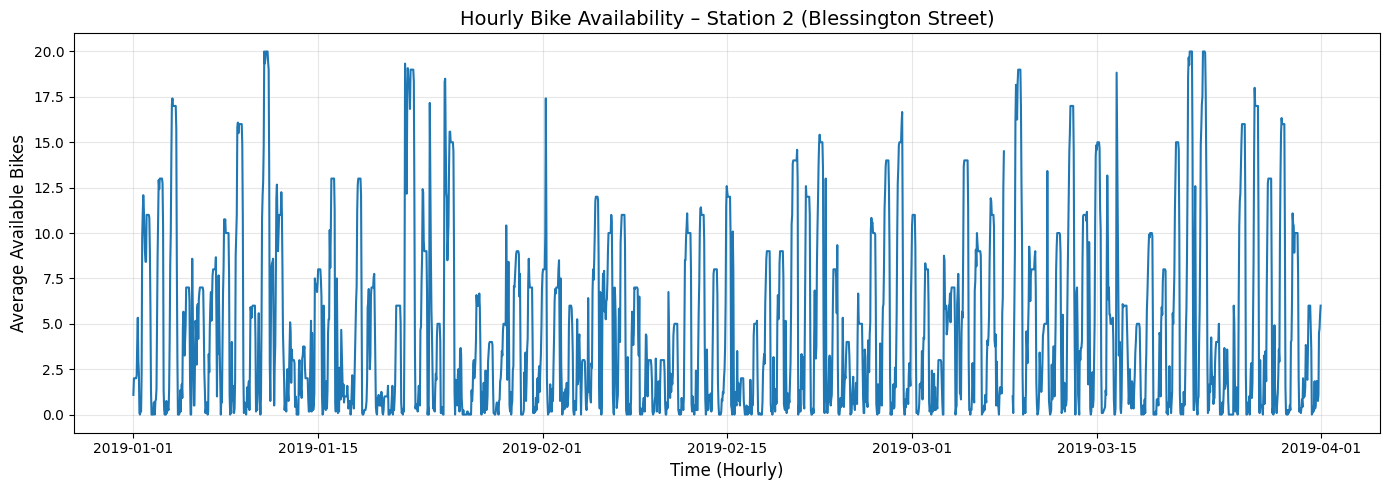

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(hourly_bikes.index, hourly_bikes.values, linewidth=1.5)

plt.title("Hourly Bike Availability – Station 2 (Blessington Street)", fontsize=14)
plt.xlabel("Time (Hourly)", fontsize=12)
plt.ylabel("Average Available Bikes", fontsize=12)

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


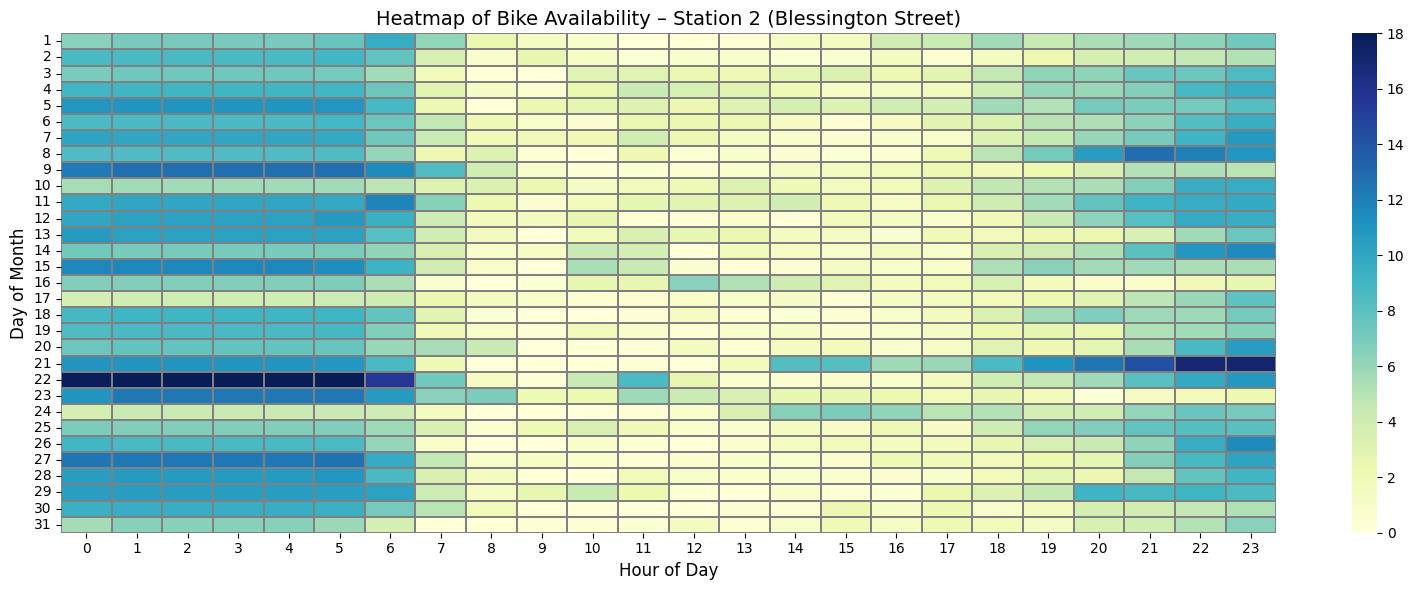

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 7 — Create pivot table: day × hour availability
heatmap_data = df_station.pivot_table(
    index='day',
    columns='hour',
    values='AVAILABLE BIKES',
    aggfunc='mean'
)

plt.figure(figsize=(16, 6))

sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    linewidths=0.3,
    linecolor='gray'
)

plt.title("Heatmap of Bike Availability – Station 2 (Blessington Street)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Month", fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# STEP 8 — Feature Engineering for Machine Learning

df_fe = df.copy()

# 1. Weekend flag
df_fe['is_weekend'] = df_fe['weekday'].isin([5, 6]).astype(int)

# 2. Rush hour flags
df_fe['is_morning_rush'] = df_fe['hour'].between(7, 10).astype(int)
df_fe['is_evening_rush'] = df_fe['hour'].between(16, 19).astype(int)

# 3. Part of month
df_fe['month_part'] = pd.cut(df_fe['day'],
                             bins=[0, 10, 20, 31],
                             labels=['beginning', 'middle', 'end'])

# 4. Lag Feature (Previous bike availability)
df_fe['lag_1'] = df_fe.groupby('STATION ID')['AVAILABLE BIKES'].shift(1)

# 5. Target variable: bikes at next timestamp
df_fe['target_next'] = df_fe.groupby('STATION ID')['AVAILABLE BIKES'].shift(-1)

# 6. Drop rows that now contain NaN due to shifting
df_fe = df_fe.dropna(subset=['lag_1', 'target_next'])

print("----- FEATURE ENGINEERING COMPLETED -----")
print(df_fe[['AVAILABLE BIKES','lag_1','target_next','is_weekend','is_morning_rush','is_evening_rush']].head())
print("\nNew shape:", df_fe.shape)


----- FEATURE ENGINEERING COMPLETED -----
   AVAILABLE BIKES  lag_1  target_next  is_weekend  is_morning_rush  \
1                1    1.0          1.0           0                0   
2                1    1.0          1.0           0                0   
3                1    1.0          1.0           0                0   
4                1    1.0          1.0           0                0   
5                1    1.0          1.0           0                0   

   is_evening_rush  
1                0  
2                0  
3                0  
4                0  
5                0  

New shape: (2912766, 23)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# STEP 9 — ML Dataset Preparation

df_ml = df_fe.copy()

# 1. Define target
y = df_ml['target_next']

# 2. Select features for ML
features = [
    'AVAILABLE BIKES',
    'lag_1',
    'hour',
    'weekday',
    'is_weekend',
    'is_morning_rush',
    'is_evening_rush',
    'BIKE STANDS',
    'LATITUDE',
    'LONGITUDE',
    'month',
    'day',
    'weekofyear',
    'month_part'
]

X = df_ml[features]

# 3. Split categorical & numerical columns
categorical_cols = ['month_part']
numeric_cols = [col for col in features if col not in categorical_cols]

# 4. Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# 5. Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("----- DATA SPLIT COMPLETED -----")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

print("\n----- PREPROCESSOR SUMMARY -----")
print(preprocess)


----- DATA SPLIT COMPLETED -----
X_train: (2330212, 14)
X_test : (582554, 14)
y_train: (2330212,)
y_test : (582554,)

----- PREPROCESSOR SUMMARY -----
ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['AVAILABLE BIKES', 'lag_1', 'hour', 'weekday',
                                  'is_weekend', 'is_morning_rush',
                                  'is_evening_rush', 'BIKE STANDS', 'LATITUDE',
                                  'LONGITUDE', 'month', 'day', 'weekofyear']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['month_part'])])


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

# STEP 10 — Baseline Models

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"\n====== {name} ======")
    print("RMSE:", rmse)
    print("MAE :", mae)
    print("R²  :", r2)
    return rmse, mae, r2

# 1. Dummy Mean Predictor
dummy_model = Pipeline([
    ('preprocess', preprocess),
    ('dummy', DummyRegressor(strategy="mean"))
])

# 2. Linear Regression
lr_model = Pipeline([
    ('preprocess', preprocess),
    ('lr', LinearRegression())
])

# Evaluate both models
dummy_results = evaluate_model("Dummy Mean Predictor", dummy_model, X_train, y_train, X_test, y_test)
lr_results = evaluate_model("Linear Regression", lr_model, X_train, y_train, X_test, y_test)



====== Dummy Mean Predictor ======
RMSE: 10.865156060353629
MAE : 9.113250747915446
R²  : -5.703174921212195e-07

====== Linear Regression ======
RMSE: 1.0105435674336436
MAE : 0.4421260082394593
R²  : 0.9913495560939914


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# STEP 11 — Neural Network Model

# Build model function
def build_nn(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Preprocess training & test data
X_train_p = preprocess.fit_transform(X_train)
X_test_p = preprocess.transform(X_test)

# Build neural network
nn_model = build_nn(X_train_p.shape[1])

# Train with early stopping
es = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = nn_model.fit(
    X_train_p, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=256,
    callbacks=[es],
    verbose=1
)

# Predict
nn_preds = nn_model.predict(X_test_p)

# Evaluate
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_preds))
nn_mae = mean_absolute_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)

print("\n====== Neural Network Results ======")
print("RMSE:", nn_rmse)
print("MAE :", nn_mae)
print("R²  :", nn_r2)


Epoch 1/10
8193/8193 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 9.1162 - val_loss: 1.0596
Epoch 2/10
8193/8193 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 1.0274 - val_loss: 1.0590
Epoch 3/10
8193/8193 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.9975 - val_loss: 1.0421
Epoch 4/10
8193/8193 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 1.0056 - val_loss: 1.0790
Epoch 5/10
8193/8193 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.9993 - val_loss: 1.0198
Epoch 6/10
8193/8193 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.9979 - val_loss: 1.0240
Epoch 7/10
8193/8193 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.9911 - val_loss: 1.0202
Epoch 8/10
8193/8193 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.9895 - val_loss: 1.0241
18205/18205 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

====== Neural Network Results ======
RMSE: 0.9860230721878063
MAE : 0.4817356400947465
R²  : 0.99176426308645


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# FAST Random Forest for large dataset
rf_model = Pipeline([
    ('preprocess', preprocess),
    ('rf', RandomForestRegressor(
        n_estimators=20,        # reduced number of trees
        max_depth=6,            # shallower trees
        max_samples=0.2,        # sample only 20% of data
        max_features='sqrt',    # fewer features at each split
        random_state=42,
        n_jobs=-1
    ))
])

print("Training RF... (much faster now)")
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\n====== FAST Random Forest Results ======")
print("RMSE:", rf_rmse)
print("MAE :", rf_mae)
print("R²  :", rf_r2)


Training RF... (much faster now)

====== FAST Random Forest Results ======
RMSE: 2.4486791835632427
MAE : 1.893149234150587
R²  : 0.9492083771839788


In [ ]:
import pandas as pd
import numpy as np

# Extract the trained RF model (inside pipeline)
rf = rf_model.named_steps['rf']

# Get feature names after preprocessing
num_features = numeric_cols
cat_features = list(preprocess.named_transformers_['cat'].get_feature_names_out())

all_features = num_features + cat_features

# Get importances
rf_importances = rf.feature_importances_

# Create importance table
rf_imp_df = pd.DataFrame({
    'feature': all_features,
    'importance': rf_importances
}).sort_values(by='importance', ascending=False)

print("\n====== Random Forest Feature Importance ======")
print(rf_imp_df)



====== Random Forest Feature Importance ======
              feature  importance
0     AVAILABLE BIKES    0.492057
1               lag_1    0.423603
9           LONGITUDE    0.026278
7         BIKE STANDS    0.025115
2                hour    0.015870
8            LATITUDE    0.010488
3             weekday    0.002343
4          is_weekend    0.001855
5     is_morning_rush    0.001486
11                day    0.000334
6     is_evening_rush    0.000328
12         weekofyear    0.000200
14  month_part_middle    0.000019
10              month    0.000016
13     month_part_end    0.000009


In [ ]:
from sklearn.inspection import permutation_importance

# Use NN model for permutation importance (on a small sample for speed)
sample_X = X_test_p[:20000]
sample_y = y_test[:20000]

print("Calculating permutation importance...")

perm = permutation_importance(
    nn_model,
    sample_X,
    sample_y,
    n_repeats=3,                # lower for speed
    random_state=42,
    scoring='neg_mean_squared_error'   # 🔹 key fix
)

perm_df = pd.DataFrame({
    'feature': all_features,
    'importance_mean': perm.importances_mean,
    'importance_std': perm.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("\n====== Permutation Importance (NN Model) ======")
print(perm_df)


Calculating permutation importance...
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━